<a href="https://colab.research.google.com/github/namita0210/ML-Models/blob/task2/emotion_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
import re
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix

# NLTK Libraries Download

In [ ]:
nltk.download("stopwords")
stop_words_english = nltk.corpus.stopwords.words("english")

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [ ]:
print(f"TOTAL LENGHT OF STOP WORDS IN ENGLISH: {len(stop_words_english)}")

TOTAL LENGHT OF STOP WORDS IN ENGLISH: 179


# Path & Process

In [ ]:
train_path = "/kaggle/input/emotion-classification-nlp/emotion-labels-train.csv"
validation_path = "/kaggle/input/emotion-classification-nlp/emotion-labels-val.csv"
test_path = "/kaggle/input/emotion-classification-nlp/emotion-labels-test.csv"

#### READING

In [ ]:
train_pd = pd.read_csv(train_path)
validation_pd = pd.read_csv(validation_path)
test_pd = pd.read_csv(test_path)

In [ ]:
all_data_list = [train_pd,validation_pd,test_pd]

#### CONTROL

In [ ]:
for x_data,x_name in zip(all_data_list,["TRAIN","VALIDATION","TEST"]):
    print(f"DATA NAME: {x_name}\n\nDATA:\n{x_data.head()}\n\n\n")

DATA NAME: TRAIN

DATA:
                                                text label
0  Just got back from seeing @GaryDelaney in Burs...   joy
1  Oh dear an evening of absolute hilarity I don'...   joy
2  Been waiting all week for this game ❤️❤️❤️ #ch...   joy
3  @gardiner_love : Thank you so much, Gloria! Yo...   joy
4  I feel so blessed to work with the family that...   joy



DATA NAME: VALIDATION

DATA:
                                                text label
0  @theclobra lol I thought maybe, couldn't decid...   joy
1  Nawaz Sharif is getting more funnier than @kap...   joy
2  Nawaz Sharif is getting more funnier than @kap...   joy
3  @tomderivan73 😁...I'll just people watch and e...   joy
4  I love my family so much #lucky #grateful #sma...   joy



DATA NAME: TEST

DATA:
                                                text label
0  You must be knowing #blithe means (adj.)  Happ...   joy
1  Old saying 'A #smile shared is one gained for ...   joy
2  Bridget Jones' Baby was bloody

In [ ]:
for x_data,x_name in zip(all_data_list,["TRAIN","VALIDATION","TEST"]):
    print(f"NULL CONTROL FOR {x_name}:\n{x_data.isnull().sum()}\n\n")

NULL CONTROL FOR TRAIN:
text     0
label    0
dtype: int64


NULL CONTROL FOR VALIDATION:
text     0
label    0
dtype: int64


NULL CONTROL FOR TEST:
text     0
label    0
dtype: int64




In [ ]:
for x_data,x_name in zip(all_data_list,["TRAIN","VALIDATION","TEST"]):
    print(f"COLUMNS FOR {x_name}:\n{x_data.columns}\n\n")

COLUMNS FOR TRAIN:
Index(['text', 'label'], dtype='object')


COLUMNS FOR VALIDATION:
Index(['text', 'label'], dtype='object')


COLUMNS FOR TEST:
Index(['text', 'label'], dtype='object')




In [ ]:
for x_data,x_name in zip(all_data_list,["TRAIN","VALIDATION","TEST"]):
    print(f"VALUE COUNTS FOR {x_name}:\n{x_data['label'].value_counts()}\n\n")

VALUE COUNTS FOR TRAIN:
fear       1147
anger       857
joy         823
sadness     786
Name: label, dtype: int64


VALUE COUNTS FOR VALIDATION:
fear       110
anger       84
joy         79
sadness     74
Name: label, dtype: int64


VALUE COUNTS FOR TEST:
fear       995
anger      760
joy        714
sadness    673
Name: label, dtype: int64




# MAPPING

In [ ]:
emotions_categories = {'joy': ['joy',
                               'happy',
                               'laugh',
                               'excited',
                               'surprise'],
                       'sadness': ['sad',
                                   'disappointed',
                                   'regret',
                                   'depressed',
                                   'lonely'],
                       'anger': ['angry',
                                 'frustrated',
                                 'annoyed',
                                 'irritated',
                                 'mad'],
                       'fear': ['afraid',
                                'scared',
                                'fear',
                                'terrified',
                                'nervous']}

In [ ]:
def DELETE_EMOJIS(datasetinit):
    lendata = len(datasetinit)
    e_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"  # dingbats
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001F910-\U0001F93F"  # Emoji Faces
        u"\U0001F940-\U0001F97F"  # Emoji Faces with Accessories
        u"\U0001F980-\U0001F9E0"  # Other emojis
                           "]+",flags=re.UNICODE)
    for co_ in range(lendata):
        tt = datasetinit["text"][co_]
        tt = e_pattern.sub(r"",tt)
        datasetinit["text"][co_] == tt

In [ ]:
def MULTI_EMOTION_MAPPING(datasetinit):
    lendata = len(datasetinit)
    for co_ in range(lendata):
        val = datasetinit["label"][co_]
        if val == "joy":
            datasetinit["label"][co_] = ",".join(str(xc) for xc in emotions_categories["joy"])
        elif val == "sadness":
            datasetinit["label"][co_] = ",".join(str(xc) for xc in emotions_categories["sadness"])
        elif val == "anger":
            datasetinit["label"][co_] = ",".join(str(xc) for xc in emotions_categories["anger"])
        elif val == "fear":
            datasetinit["label"][co_] = ",".join(str(xc) for xc in emotions_categories["fear"])
        else:
            pass

In [ ]:
for x_data,x_name in zip(all_data_list,["TRAIN","VALIDATION","TEST"]):
    print(f"PROCESS OF {x_name}\n")
    MULTI_EMOTION_MAPPING(x_data)
    x_data.reset_index(drop=True,inplace=True)
    print(f"[+++] DONE FOR {x_name}\n\n")

PROCESS OF TRAIN

[+++] DONE FOR TRAIN


PROCESS OF VALIDATION

[+++] DONE FOR VALIDATION


PROCESS OF TEST

[+++] DONE FOR TEST




In [ ]:
for x_data,x_name in zip(all_data_list,["TRAIN","VALIDATION","TEST"]):
    print(f"CONTROL FOR - {x_name}\n\n{x_data.head()}\n\n\n")

CONTROL FOR - TRAIN

                                                text  \
0  Just got back from seeing @GaryDelaney in Burs...   
1  Oh dear an evening of absolute hilarity I don'...   
2  Been waiting all week for this game ❤️❤️❤️ #ch...   
3  @gardiner_love : Thank you so much, Gloria! Yo...   
4  I feel so blessed to work with the family that...   

                              label  
0  joy,happy,laugh,excited,surprise  
1  joy,happy,laugh,excited,surprise  
2  joy,happy,laugh,excited,surprise  
3  joy,happy,laugh,excited,surprise  
4  joy,happy,laugh,excited,surprise  



CONTROL FOR - VALIDATION

                                                text  \
0  @theclobra lol I thought maybe, couldn't decid...   
1  Nawaz Sharif is getting more funnier than @kap...   
2  Nawaz Sharif is getting more funnier than @kap...   
3  @tomderivan73 😁...I'll just people watch and e...   
4  I love my family so much #lucky #grateful #sma...   

                              label  
0  joy,hap

In [ ]:
for x_data,x_name in zip(all_data_list,["TRAIN","VALIDATION","TEST"]):
    print(f"CONTROL FOR MAPPING - {x_name}\n\n{x_data['label'].value_counts()}\n\n\n")

CONTROL FOR MAPPING - TRAIN

afraid,scared,fear,terrified,nervous        1147
angry,frustrated,annoyed,irritated,mad       857
joy,happy,laugh,excited,surprise             823
sad,disappointed,regret,depressed,lonely     786
Name: label, dtype: int64



CONTROL FOR MAPPING - VALIDATION

afraid,scared,fear,terrified,nervous        110
angry,frustrated,annoyed,irritated,mad       84
joy,happy,laugh,excited,surprise             79
sad,disappointed,regret,depressed,lonely     74
Name: label, dtype: int64



CONTROL FOR MAPPING - TEST

afraid,scared,fear,terrified,nervous        995
angry,frustrated,annoyed,irritated,mad      760
joy,happy,laugh,excited,surprise            714
sad,disappointed,regret,depressed,lonely    673
Name: label, dtype: int64





In [ ]:
for x_data,x_name in zip(all_data_list,["TRAIN","VALIDATION","TEST"]):
    print(f"NULL CONTROL FOR {x_name}:\n{x_data.isnull().sum()}\n\n")

NULL CONTROL FOR TRAIN:
text     0
label    0
dtype: int64


NULL CONTROL FOR VALIDATION:
text     0
label    0
dtype: int64


NULL CONTROL FOR TEST:
text     0
label    0
dtype: int64




In [ ]:
for x_data,x_name in zip(all_data_list,["TRAIN","VALIDATION","TEST"]):
    print(f"PROCESS OF {x_name}\n")
    DELETE_EMOJIS(x_data)
    x_data.reset_index(drop=True,inplace=True)
    print(f"[+++] DONE FOR {x_name}\n\n")

PROCESS OF TRAIN

[+++] DONE FOR TRAIN


PROCESS OF VALIDATION

[+++] DONE FOR VALIDATION


PROCESS OF TEST

[+++] DONE FOR TEST




In [ ]:
train_pd.head()

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,"joy,happy,laugh,excited,surprise"
1,Oh dear an evening of absolute hilarity I don'...,"joy,happy,laugh,excited,surprise"
2,Been waiting all week for this game ❤️❤️❤️ #ch...,"joy,happy,laugh,excited,surprise"
3,"@gardiner_love : Thank you so much, Gloria! Yo...","joy,happy,laugh,excited,surprise"
4,I feel so blessed to work with the family that...,"joy,happy,laugh,excited,surprise"


In [ ]:
train_pd.tail()

,text,label
3608,@VivienLloyd Thank you so much! Just home - st...,"sad,disappointed,regret,depressed,lonely"
3609,Just put the winter duvet on ☃️❄️🌬☔️,"sad,disappointed,regret,depressed,lonely"
3610,@SilkInSide @TommyJoeRatliff that's so pretty!...,"sad,disappointed,regret,depressed,lonely"
3611,@BluesfestByron second artist announcement loo...,"sad,disappointed,regret,depressed,lonely"
3612,I can literally eat creamy pesto pasta topped ...,"sad,disappointed,regret,depressed,lonely"


In [ ]:
all_train_data = pd.concat([train_pd,validation_pd,test_pd],ignore_index=True)

In [ ]:
all_train_data

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,"joy,happy,laugh,excited,surprise"
1,Oh dear an evening of absolute hilarity I don'...,"joy,happy,laugh,excited,surprise"
2,Been waiting all week for this game ❤️❤️❤️ #ch...,"joy,happy,laugh,excited,surprise"
3,"@gardiner_love : Thank you so much, Gloria! Yo...","joy,happy,laugh,excited,surprise"
4,I feel so blessed to work with the family that...,"joy,happy,laugh,excited,surprise"
...,...,...
7097,Why does Candice constantly pout #GBBO 💄😒,"sad,disappointed,regret,depressed,lonely"
7098,"@redBus_in #unhappy with #redbus CC, when I ta...","sad,disappointed,regret,depressed,lonely"
7099,"@AceOperative789 no pull him afew weeks ago, s...","sad,disappointed,regret,depressed,lonely"
7100,I'm buying art supplies and I'm debating how s...,"sad,disappointed,regret,depressed,lonely"


# VECTORIZER

In [ ]:
vectorizer_train = CountVectorizer(stop_words=stop_words_english)

In [ ]:
xall = vectorizer_train.fit_transform(all_train_data["text"])
yall = all_train_data["label"]

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(xall,
                                             yall,
                                             test_size=0.2,
                                             random_state=42,
                                             shuffle=True)

In [ ]:
print(f"X TRAIN SHAPE:\n\n{xtrain.shape}")
print(f"Y TRAIN SHAPE:\n\n{ytrain.shape}")
print(f"X TEST SHAPE:\n\n{xtest.shape}")
print(f"Y TEST SHAPE:\n\n{ytest.shape}")

X TRAIN SHAPE:

(5681, 15735)
Y TRAIN SHAPE:

(5681,)
X TEST SHAPE:

(1421, 15735)
Y TEST SHAPE:

(1421,)


# Vocabulary

In [ ]:
voc = vectorizer_train.get_feature_names_out()
print(f"TARGET VOCABULARY:\n\n{voc}")

TARGET VOCABULARY:

['00' '000' '00pm' ... 'सत' 'アニメ' '화양연화']


# Model

In [ ]:
clf = MultinomialNB()

In [ ]:
clf.fit(xtrain,ytrain)

MultinomialNB()

In [ ]:
ypred = clf.predict(xtest)

In [ ]:
print(f"ACCURACY SCORE: {accuracy_score(ytest,ypred)}")

ACCURACY SCORE: 0.8395496129486277


In [ ]:
print(f"MODEL CLASSES:\n\n{clf.classes_}")

MODEL CLASSES:

['afraid,scared,fear,terrified,nervous'
 'angry,frustrated,annoyed,irritated,mad'
 'joy,happy,laugh,excited,surprise'
 'sad,disappointed,regret,depressed,lonely']


In [ ]:
conf_matrix = confusion_matrix(ytest,ypred)

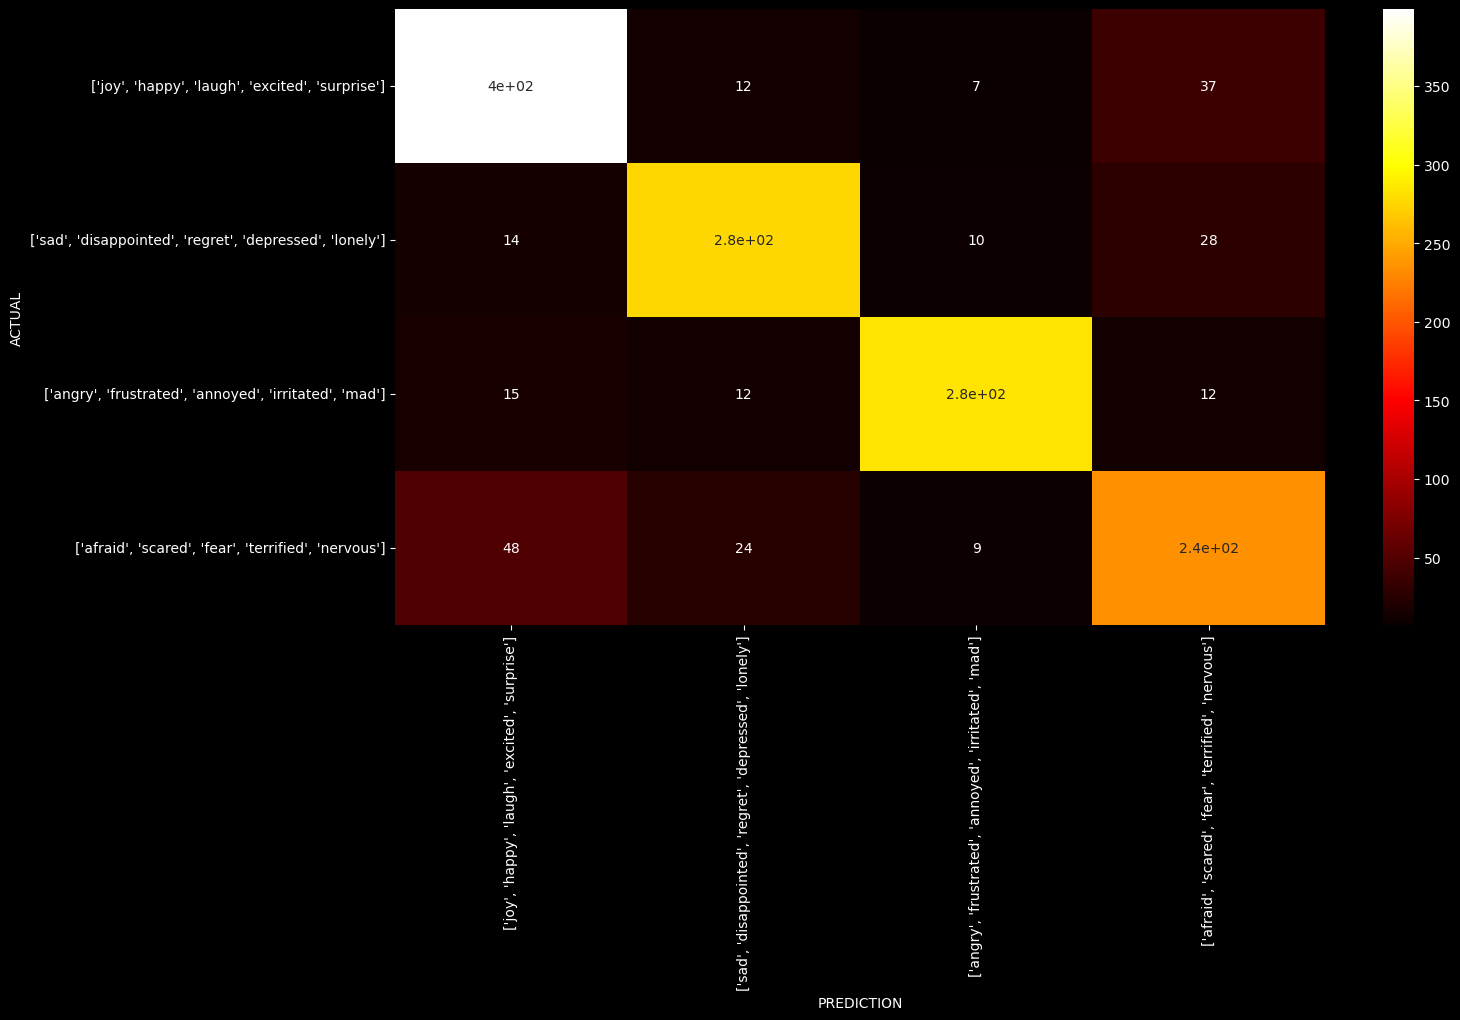

In [ ]:
plt.style.use("dark_background")
plt.figure(figsize=(15,8))
sns.heatmap(conf_matrix,
           annot=True,
           cmap="hot",
           xticklabels=emotions_categories.values(),
           yticklabels=emotions_categories.values())
plt.xlabel("PREDICTION")
plt.ylabel("ACTUAL")
plt.show()

# Test Input

In [ ]:
test_sentence = "I don't know what's going on in this world, but all you know is that connection will bring freedom. Although we live in an unknown world, the existence of a woman who burns heaven is the cause of all beauty."

In [ ]:
words_of_sentence = nltk.word_tokenize(test_sentence)

In [ ]:
print(f"WORDS:\n\n{words_of_sentence}")

WORDS:

['I', 'do', "n't", 'know', 'what', "'s", 'going', 'on', 'in', 'this', 'world', ',', 'but', 'all', 'you', 'know', 'is', 'that', 'connection', 'will', 'bring', 'freedom', '.', 'Although', 'we', 'live', 'in', 'an', 'unknown', 'world', ',', 'the', 'existence', 'of', 'a', 'woman', 'who', 'burns', 'heaven', 'is', 'the', 'cause', 'of', 'all', 'beauty', '.']


In [ ]:
words_of_sentence = [w_ for w_ in words_of_sentence if w_ not in stop_words_english]

In [ ]:
print(f"WORDS WITHOUT STOP WORDS:\n\n{words_of_sentence}")

WORDS WITHOUT STOP WORDS:

['I', "n't", 'know', "'s", 'going', 'world', ',', 'know', 'connection', 'bring', 'freedom', '.', 'Although', 'live', 'unknown', 'world', ',', 'existence', 'woman', 'burns', 'heaven', 'cause', 'beauty', '.']


In [ ]:
transform_test = vectorizer_train.transform(words_of_sentence)

In [ ]:
pred_test = clf.predict(transform_test)

In [ ]:
print(f"PREDICTION:\n\n{pred_test[0]}")

PREDICTION:

afraid,scared,fear,terrified,nervous


# Single Text Prediction

In [ ]:
single_text = "When I look at your eyes, I see stars"
transform_single = vectorizer_train.transform([single_text])

In [ ]:
print(f"SINGLE VECTORIZING OUTPUT:\n\n{transform_single.data}")

SINGLE VECTORIZING OUTPUT:

[1 1 1 1]


In [ ]:
pred_test = clf.predict(transform_single)

In [ ]:
print(f"PREDICTION:\n\n{pred_test[0]}")

PREDICTION:

sad,disappointed,regret,depressed,lonely


In [ ]:
love_text = "I LOVE YOU"
transform_love = vectorizer_train.transform([love_text])

In [ ]:
pred_love = clf.predict(transform_love)

In [ ]:
print(f"PREDICTION:\n\n{pred_love[0]}")

PREDICTION:

joy,happy,laugh,excited,surprise


In [ ]:
additional_speech = "When I see my wife's mother, suddenly I feel afraid of her thought of not let her go with me"
transform_additional = vectorizer_train.transform([additional_speech])

In [ ]:
pred_additional = clf.predict(transform_additional)

In [ ]:
print(f"PREDICTION:\n\n{pred_additional[0]}")

PREDICTION:

afraid,scared,fear,terrified,nervous


In [ ]:
text_II = "We will go to another city and create a new life in there"
transform_text_II = vectorizer_train.transform([text_II])
pred_text_II = clf.predict(transform_text_II)

In [ ]:
print(f"PREDICTION:\n\n{pred_text_II[0]}")

PREDICTION:

afraid,scared,fear,terrified,nervous
